For this project I chose the Intel Image Classification dataset. This is image data of Natural Scenes around the world. [link to dataset](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)

**Task 1**

Part 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/drive")

# Define dataset paths
dataset_path = "/content/drive/MyDrive/seg_test/"

import os
print("Path exists:", os.path.exists(dataset_path))

files = os.listdir(dataset_path)

print("Folders:", os.listdir(dataset_path))

# Image preprocessing and augmentation
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Splitting into train and validation sets
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Building the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes
])

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10)

# Evaluating the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Path exists: True
Folders: ['street', 'forest', 'glacier', 'sea', 'mountain', 'buildings']
Found 2402 images belonging to 6 classes.
Found 598 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 406s 5s/step - accuracy: 0.3005 - loss: 1.8298 - val_accuracy: 0.5084 - val_loss: 1.2397
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.4826 - loss: 1.2785 - val_accuracy: 0.5268 - val_loss: 1.2083
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5027 - loss: 1.2474 - val_accuracy: 0.5234 - val_loss: 1.1897
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.5405 - loss: 1.1624 - val_accuracy: 0.5669 - val_loss: 1.0998
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5893 - loss: 1.0598 - val_accuracy: 0.5836 - val_loss: 1.1303
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5750 - loss: 1.0867 - val_accuracy: 0.5468 - val_loss: 1.1479
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.5743 - loss: 1.0886 - val_accuracy: 0.6037 - val_loss: 1.0428
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.5818 - loss: 1.0671 - val_accuracy: 0.6187 - v

Part 2

Mounted at /content/drive
Found 2402 images belonging to 6 classes.
Found 598 images belonging to 6 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 715s 9s/step - accuracy: 0.2119 - loss: 1.9631 - val_accuracy: 0.2876 - val_loss: 1.7667
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 316s 4s/step - accuracy: 0.1855 - loss: 1.8751 - val_accuracy: 0.2759 - val_loss: 1.7544
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 0.1918 - loss: 1.7858 - val_accuracy: 0.2375 - val_loss: 1.7393
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.2243 - loss: 1.7445 - val_accuracy: 0.2542 - val_loss: 1.7318
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.2474 - loss: 1.7311 - val_accuracy: 0.2475 - val_loss: 1.7108
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.2540 - loss: 1.7128 - val_accuracy: 0.3027 - val_loss: 1.7042
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.2791 - loss: 1.6959 - val_accuracy: 0.3261 - val_loss: 1.6895
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 279s 4s/step - accuracy: 0.3026 - loss: 1.6802 - val_accuracy: 0.3010 - v

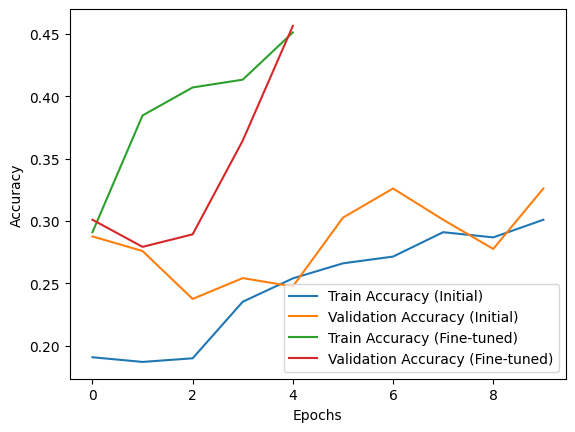

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models



# Load pre-trained ResNet50 without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Build new classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

# Unfreeze the last 10 layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(train_generator,
                         validation_data=val_generator,
                         epochs=5)

# Evaluate the fine-tuned model
val_loss_fine, val_acc_fine = model.evaluate(val_generator)
print(f"Fine-Tuned Validation Accuracy: {val_acc_fine:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy (Initial)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Initial)')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (Fine-tuned)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (Fine-tuned)')


The Validation accuracy for both the pre-trained and fine tuned model were very low. This might be due to unsufficient training data for the large ResNet50 model. In addition, smaller datasets with less variation might cause overfitting or poor generalization.

Part 3

Mounted at /content/drive
Found 2402 images belonging to 6 classes.
Found 598 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 732s 10s/step - accuracy: 0.2340 - loss: 1.7999 - val_accuracy: 0.4732 - val_loss: 1.3527
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4682 - loss: 1.2986 - val_accuracy: 0.5502 - val_loss: 1.1540
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4970 - loss: 1.2722 - val_accuracy: 0.5251 - val_loss: 1.2016
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5126 - loss: 1.2113 - val_accuracy: 0.5619 - val_loss: 1.1219
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5561 - loss: 1.1215 - val_accuracy: 0.5686 - val_loss: 1.0777
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5590 - loss: 1.0868 - val_accuracy: 0.5502 - val_loss: 1.1165
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6017 - loss: 1.0522 - val_accuracy: 0.5853 - val_loss: 1.0820
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.5872 - loss: 1.0719 - val_accuracy: 0.6187 - 

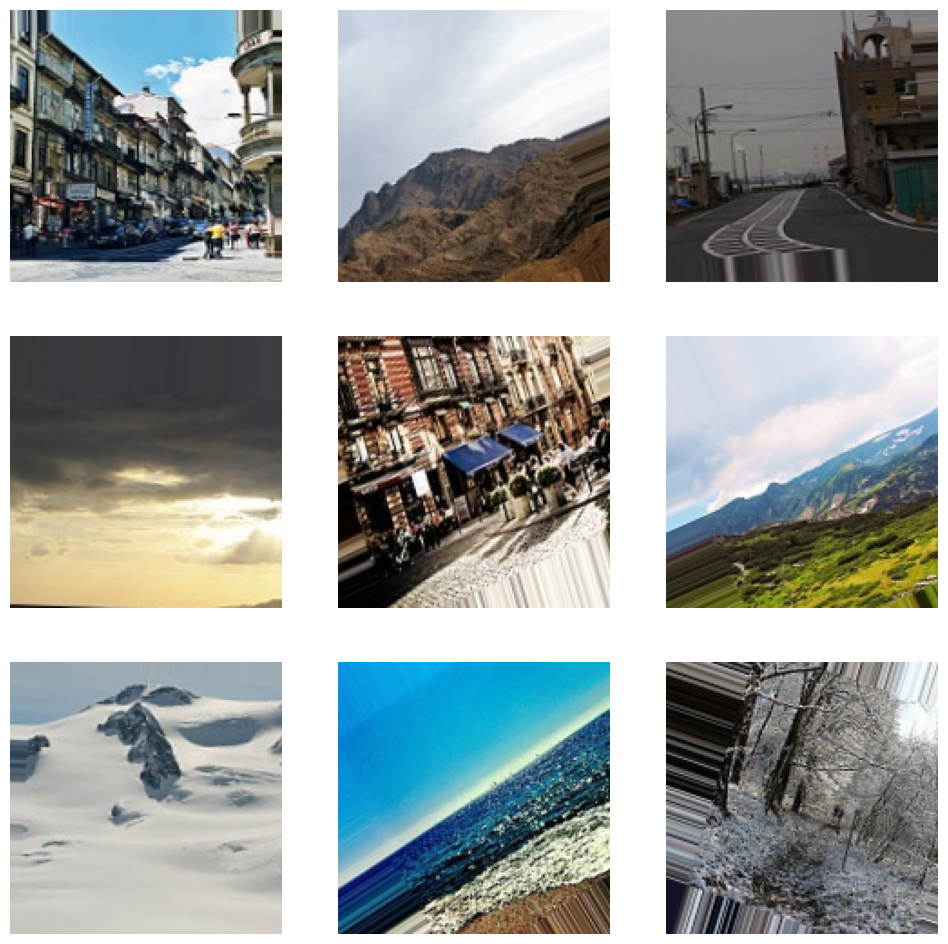

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rotate by 40 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,validation_data=val_generator,epochs=10)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy (with augmentation): {val_acc:.4f}")

import matplotlib.pyplot as plt

# Get a batch of augmented images
images, labels = next(train_generator)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])



The results in Part 1 and Part 3 are pretty close however part 3 is slightly lower (0.64 vs 0.62)

**Task 2**

Part 1

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 161ms/step - loss: 0.0324
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 158ms/step - loss: 0.0076
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 157ms/step - loss: 0.0058
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 156ms/step - loss: 0.0054
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 156ms/step - loss: 0.0051
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 157ms/step - loss: 0.0050
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 156ms/step - loss: 0.0049
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 155ms/step - loss: 0.0048
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 155ms/step - loss: 0.0048
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 155ms/step - loss: 0.0047
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - loss: 0.0047
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 155ms/step - loss: 0.0046
Epoch 13/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - loss: 0.0046
Epoch 14/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - loss: 0.0046
E

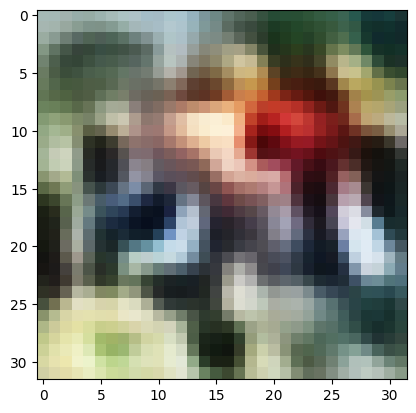

In [ ]:
import tensorflow as tf
import numpy as np

(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

latent_dim = 128

encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(latent_dim + latent_dim)
])

decoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
    tf.keras.layers.Dense(8 * 8 * 64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(8, 8, 64)),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=(1, 1), padding='same', activation='sigmoid')
])
def sample(mu, log_var):
    eps = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(0.5 * log_var) * eps
class CVAE(tf.keras.Model):
    def __init__(self, latent_dim):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = encoder
        self.decoder = decoder

    def encode(self, x):
        z_mean, z_log_var = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return z_mean, z_log_var

    def decode(self, z):
        return self.decoder(z)

    def call(self, x):
        z_mean, z_log_var = self.encode(x)
        z = sample(z_mean, z_log_var)
        return self.decode(z)

cvae = CVAE(latent_dim)
cvae.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
cvae.fit(x_train, x_train, epochs=20, batch_size=64)
import matplotlib.pyplot as plt

z = tf.random.normal(shape=(1, latent_dim))
generated_image = cvae.decode(z)[0]
plt.imshow(generated_image)
plt.show()


Part 2

Time for epoch 1 is 1178.14 sec
Time for epoch 2 is 1173.35 sec
Time for epoch 3 is 1164.63 sec
Time for epoch 4 is 1158.00 sec
Time for epoch 5 is 1172.88 sec
Time for epoch 6 is 1162.36 sec
Time for epoch 7 is 1163.38 sec
Time for epoch 8 is 1163.18 sec
Time for epoch 9 is 1153.05 sec
Time for epoch 10 is 1156.60 sec


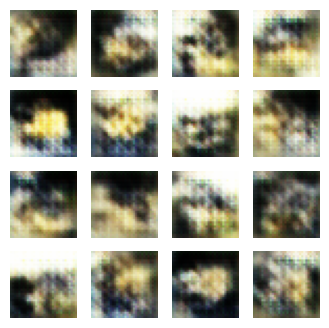

In [ ]:
import tensorflow as tf

(x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalize to [-1, 1]
BUFFER_SIZE = 50000
BATCH_SIZE = 64

dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(100,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Reshape((8, 8, 256)),
        tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')
    ])
    return model
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1)
    ])
    return model
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

generator = build_generator()
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
import time

EPOCHS = 10
seed = tf.random.normal([16, 100])

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        for image_batch in dataset:
            train_step(image_batch)
        print(f'Time for epoch {epoch + 1} is {time.time() - start:.2f} sec')

train(dataset, EPOCHS)
import matplotlib.pyplot as plt

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow((predictions[i] * 127.5 + 127.5).numpy().astype("uint8"))
        plt.axis('off')
    plt.show()

generate_and_save_images(generator, 0, seed)


This code took 3 hours to run with only 10 Epochs. I am not sure why the image quality is so bad, but they seem to be of similar images.

**Task 3**

Part 1

In [ ]:
import numpy as np
import pandas as pd

def scaled_dot_product_attention(query, key, value, mask=None):
    depth = key.shape[-1]

    # Calculate the dot product of query and key tensors
    matmul_qk = np.matmul(query, np.transpose(key, [0, 2, 1]))

    # Scale the dot product by the square root of the depth
    scaled_attention_logits = matmul_qk / np.sqrt(depth)

    # Apply mask if provided
    if mask is not None:
        # Add a large negative value to masked positions to make their softmax outputs close to 0
        scaled_attention_logits += (mask * -1e9)

    # Apply softmax to get attention weights
    attention_weights = softmax(scaled_attention_logits)

    # Calculate the weighted sum of the value vectors
    output = np.matmul(attention_weights, value)

    return output, attention_weights

def softmax(x):

    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)


Query shape: (2, 3, 5)
Key shape: (2, 4, 5)
Value shape: (2, 4, 6)
Output shape: (2, 3, 6)
Attention weights shape: (2, 3, 4)

Attention weights for the first batch and query:
         Key 0  Key 1  Key 2  Key 3
Query 0    0.0    0.0    0.0    1.0
Query 1    0.0    0.0    0.0    1.0
Query 2    0.0    0.0    0.0    1.0


Part 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Embedding, LSTM, Input
from tensorflow.keras.models import Model
import numpy as np


# Improved Scaled Dot-Product Attention Layer
class ScaledDotProductAttention(Layer):
    def __init__(self, d_model, dropout_rate=0.1):
        super(ScaledDotProductAttention, self).__init__()
        self.d_model = d_model
        self.dropout = Dropout(dropout_rate)

    def call(self, queries, keys, values, mask=None, training=True):
        d_k = tf.cast(tf.shape(keys)[-1], tf.float32)
        scores = tf.matmul(queries, keys, transpose_b=True) / tf.math.sqrt(d_k)

        if mask is not None:
            scores += (mask * -1e9)  # Masking to ignore padding tokens

        attention_weights = tf.nn.softmax(scores, axis=-1)
        attention_weights = self.dropout(attention_weights, training=training)
        output = tf.matmul(attention_weights, values)
        return output, attention_weights

# Improved Encoder with Bidirectional LSTM
class Encoder(Layer):
    def __init__(self, vocab_size, d_model, enc_units, dropout_rate=0.1):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.enc_units = enc_units
        self.embedding = Embedding(vocab_size, d_model)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)
        self.bidirectional_lstm = Bidirectional(LSTM(enc_units, return_sequences=True, return_state=True))
        self.attention = ScaledDotProductAttention(d_model, dropout_rate)

    def call(self, x, hidden, training=True):
        x = self.embedding(x)
        x = self.dropout1(x, training=training)

        # Bidirectional LSTM returns [output, forward_h, forward_c, backward_h, backward_c]
        outputs = self.bidirectional_lstm(x, initial_state=hidden)
        output = outputs[0]

        # Combine forward and backward states
        state_h = tf.concat([outputs[1], outputs[3]], axis=-1)
        state_c = tf.concat([outputs[2], outputs[4]], axis=-1)

        output = self.dropout2(output, training=training)
        attn_output, _ = self.attention(output, output, output, training=training)  # Self-attention
        return attn_output, state_h, state_c

    def initialize_hidden_state(self, batch_size):
        # For bidirectional, we need to initialize both forward and backward states
        return [tf.zeros((batch_size, self.enc_units)), tf.zeros((batch_size, self.enc_units)),
                tf.zeros((batch_size, self.enc_units)), tf.zeros((batch_size, self.enc_units))]

# Improved Decoder with attention
class Decoder(Layer):
    def __init__(self, vocab_size, d_model, dec_units, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.dec_units = dec_units
        self.embedding = Embedding(vocab_size, d_model)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

        # We use twice the encoder units because we concatenated forward and backward states
        self.lstm = LSTM(2 * dec_units, return_sequences=True, return_state=True)

        # Add cross-attention
        self.attention = ScaledDotProductAttention(d_model, dropout_rate)

        # Projection layers
        self.fc1 = Dense(d_model, activation='relu')
        self.fc2 = Dense(vocab_size)

    def call(self, x, hidden, enc_output, training=True):
        x = self.embedding(x)
        x = self.dropout1(x, training=training)

        # First LSTM layer
        output, state_h, state_c = self.lstm(x, initial_state=hidden)

        # Apply attention
        context, attention_weights = self.attention(output, enc_output, enc_output, training=training)

        # Concatenate context and output
        output = tf.concat([context, output], axis=-1)
        output = self.dropout2(output, training=training)

        # Final dense layers
        output = self.fc1(output)
        output = self.fc2(output)
        output = tf.nn.softmax(output, axis=-1)

        return output, state_h, state_c, attention_weights

# Improved Seq2Seq model
class Seq2Seq(Model):
    def __init__(self, inp_vocab_size, tar_vocab_size, d_model, enc_units, dec_units, dropout_rate=0.1):
        super(Seq2Seq, self).__init__()
        self.encoder = Encoder(inp_vocab_size, d_model, enc_units, dropout_rate)
        self.decoder = Decoder(tar_vocab_size, d_model, dec_units, dropout_rate)

    def call(self, inputs, training=True):
        enc_input, dec_input = inputs

        batch_size = tf.shape(enc_input)[0]
        enc_hidden = self.encoder.initialize_hidden_state(batch_size)
        enc_output, enc_hidden_h, enc_hidden_c = self.encoder(enc_input, enc_hidden, training=training)

        dec_hidden = [enc_hidden_h, enc_hidden_c]
        dec_output, _, _, _ = self.decoder(dec_input, dec_hidden, enc_output, training=training)

        return dec_output

    # Added method for Part 3
    def translate(self, sentence, en_tokenizer, fr_tokenizer, max_length_inp, max_length_targ):

        inputs = [en_tokenizer.word_index.get(word, en_tokenizer.word_index['<UNK>'])
                 for word in sentence.split(' ')]
        inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
        inputs = tf.convert_to_tensor(inputs)

        result = ''
        attention_plot = np.zeros((max_length_targ, max_length_inp))

        # Initial encoder states
        batch_size = tf.shape(inputs)[0]
        enc_hidden = self.encoder.initialize_hidden_state(batch_size)
        enc_output, enc_hidden_h, enc_hidden_c = self.encoder(inputs, enc_hidden, training=False)

        # Initial decoder state from encoder
        dec_hidden = [enc_hidden_h, enc_hidden_c]

        # Start with '<start>' token
        dec_input = tf.expand_dims([fr_tokenizer.word_index['<start>']], 0)

        for t in range(max_length_targ):
            predictions, dec_hidden_h, dec_hidden_c, attention_weights = self.decoder(
                dec_input, dec_hidden, enc_output, training=False)

            # Store attention weights
            attention_weights = tf.reshape(attention_weights, (-1,))
            attention_plot[t] = attention_weights.numpy()[:max_length_inp]

            # Get the predicted token
            predicted_id = tf.argmax(predictions[0, 0]).numpy()

            # If end token, stop predicting
            if predicted_id == fr_tokenizer.word_index['<end>']:
                break

            # Get the word and add to result
            if predicted_id in fr_tokenizer.index_word:
                word = fr_tokenizer.index_word[predicted_id]
                result += word + ' '
            else:
                result += '<UNK> '

            # Pass the predicted token back as input
            dec_input = tf.expand_dims([predicted_id], 0)
            dec_hidden = [dec_hidden_h, dec_hidden_c]

        return result, attention_plot


Part 3

For this part I used a csv file with english and french language translations. [link to dataset](https://www.kaggle.com/datasets/rajpulapakura/english-to-french-small-dataset)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Embedding, LSTM, Dense, Dropout, Bidirectional, Attention
from tensorflow.keras.models import Model
import numpy as np
import os
import re
import unicodedata
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction


def create_dataset(csv_path, num_examples=None):
    en_sentences = []
    fr_sentences = []

    df = pd.read_csv(csv_path)

    # Get English and French sentences from the CSV
    en_sentences = df['English'].astype(str).tolist()
    fr_sentences = df['French'].astype(str).tolist()

    if num_examples:
        en_sentences = en_sentences[:num_examples]
        fr_sentences = fr_sentences[:num_examples]

    return en_sentences, fr_sentences

def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', oov_token='<UNK>')
    lang_tokenizer.fit_on_texts(lang)
    tensor = lang_tokenizer.texts_to_sequences(lang)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    return tensor, lang_tokenizer

def load_dataset(csv_path, num_examples=None, test_size=0.2):
    en_sentences, fr_sentences = create_dataset(csv_path, num_examples)

    # Split into train and test sets
    en_train, en_test, fr_train, fr_test = train_test_split(
        en_sentences, fr_sentences, test_size=test_size, random_state=42)

    # Tokenize
    input_tensor_train, en_tokenizer = tokenize(en_train)
    target_tensor_train, fr_tokenizer = tokenize(fr_train)

    input_tensor_test = en_tokenizer.texts_to_sequences(en_test)
    input_tensor_test = tf.keras.preprocessing.sequence.pad_sequences(input_tensor_test, padding='post')

    target_tensor_test = fr_tokenizer.texts_to_sequences(fr_test)
    target_tensor_test = tf.keras.preprocessing.sequence.pad_sequences(target_tensor_test, padding='post')

    return (input_tensor_train, target_tensor_train, input_tensor_test, target_tensor_test,
            en_tokenizer, fr_tokenizer, en_test, fr_test)


# Training function with improvements
def train_model(input_tensor_train, target_tensor_train, BATCH_SIZE, epochs, vocab_inp_size, vocab_tar_size):
    BUFFER_SIZE = len(input_tensor_train)
    steps_per_epoch = len(input_tensor_train) // BATCH_SIZE

    dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

    # Define model parameters
    d_model = 256
    enc_units = 512
    dec_units = 512
    dropout_rate = 0.2  # Increased dropout for better regularization

    # Initialize the model
    model = Seq2Seq(vocab_inp_size, vocab_tar_size, d_model, enc_units, dec_units, dropout_rate)

    # Learning rate schedule
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=steps_per_epoch,
        decay_rate=0.95)

    # Define optimizer with learning rate schedule
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    # Define loss function
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=False, reduction='none')

    def loss_function(real, pred):
        mask = tf.math.logical_not(tf.math.equal(real, 0))
        loss_ = loss_object(real, pred)
        mask = tf.cast(mask, dtype=loss_.dtype)
        loss_ *= mask
        return tf.reduce_mean(loss_)

    # Training metrics
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

    # Training loop
    losses = []
    accuracies = []

    for epoch in range(epochs):
        for (batch, (inp, targ)) in enumerate(dataset):
          with tf.GradientTape() as tape:
            # Teacher forcing - feeding the target as the next input
            dec_output = model([inp, targ[:, :-1]], training=True)
            batch_loss = loss_function(targ[:, 1:], dec_output)

            # Calculate gradients
            variables = model.trainable_variables
            gradients = tape.gradient(batch_loss, variables)

            # Gradient clipping to prevent exploding gradients
            gradients, _ = tf.clip_by_global_norm(gradients, 5.0)

            # Apply gradients
            optimizer.apply_gradients(zip(gradients, variables))

            # Update metrics
            train_loss(batch_loss)
            train_accuracy(targ[:, 1:], dec_output)

        # Print epoch results
        print(f'Epoch {epoch+1}')
        print(f'  Loss: {train_loss.result():.4f}')
        print(f'  Accuracy: {train_accuracy.result():.4f}')


    return model, losses, accuracies

# Evaluate BLEU score with improved output handling
def evaluate_bleu(model, en_test, fr_test, en_tokenizer, fr_tokenizer, max_length_inp, max_length_targ):
    references = []
    hypotheses = []


    for i in range(len(en_test)):
        reference = fr_test[i].split(' ')
        if '<start>' in reference:
            reference = reference[reference.index('<start>')+1:]
        if '<end>' in reference:
            reference = reference[:reference.index('<end>')]
        references.append([reference])

        prediction, _ = model.translate(en_test[i], en_tokenizer, fr_tokenizer, max_length_inp, max_length_targ)
        hypothesis = prediction.split(' ')
        hypothesis = [word for word in hypothesis if word.strip()]  # Remove empty strings
        hypotheses.append(hypothesis)

        if i < 5:  # Print a few examples
            print(f"\nInput: {en_test[i]}")
            print(f"Reference: {' '.join(reference)}")
            print(f"Prediction: {prediction}")

    # Calculate BLEU score
    smoothie = SmoothingFunction().method1
    bleu1 = corpus_bleu(references, hypotheses, weights=(1, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = corpus_bleu(references, hypotheses, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu3 = corpus_bleu(references, hypotheses, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothie)
    bleu4 = corpus_bleu(references, hypotheses, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

    print(f'\nBLEU Scores:')
    print(f'BLEU-1: {bleu1:.4f}')
    print(f'BLEU-2: {bleu2:.4f}')
    print(f'BLEU-3: {bleu3:.4f}')
    print(f'BLEU-4: {bleu4:.4f}')

    return bleu1, bleu2, bleu3, bleu4


csv_path = "english_french.csv"

# Load and preprocess data - limit examples to avoid memory issues
num_examples = 10000 # Adjust based on your system's memory


(input_tensor_train, target_tensor_train, input_tensor_test, target_tensor_test,
  en_tokenizer, fr_tokenizer, en_test, fr_test) = load_dataset(csv_path, num_examples)

# Get vocabulary sizes
vocab_inp_size = len(en_tokenizer.word_index) + 1
vocab_tar_size = len(fr_tokenizer.word_index) + 1

# Get maximum sequence lengths
max_length_inp = input_tensor_train.shape[1]
max_length_targ = target_tensor_train.shape[1]

# Define training parameters
BATCH_SIZE = 64
epochs = 15  # More epochs for better learning

# Train the model
print(f"\nTraining model...")
model, losses, accuracies = train_model(input_tensor_train, target_tensor_train, BATCH_SIZE, epochs,
                                      vocab_inp_size, vocab_tar_size)

# Evaluate BLEU score on test set
print("\nEvaluating BLEU scores:")
bleu_scores = evaluate_bleu(model, en_test, fr_test, en_tokenizer, fr_tokenizer,
                          max_length_inp, max_length_targ)



Training model...
Epoch 1 Batch 0 Loss 3.1423
Epoch 1 Batch 100 Loss 1.4057
Epoch 1
  Loss: 1.6723
  Accuracy: 0.1312
Epoch 2 Batch 0 Loss 1.4253
Epoch 2 Batch 100 Loss 1.1930
Epoch 2
  Loss: 1.4665
  Accuracy: 0.1517
Epoch 3 Batch 0 Loss 1.1407
Epoch 3 Batch 100 Loss 1.1382
Epoch 3
  Loss: 1.3415
  Accuracy: 0.1669
Epoch 4 Batch 0 Loss 0.9822
Epoch 4 Batch 100 Loss 0.9435
Epoch 4
  Loss: 1.2505
  Accuracy: 0.1775
Epoch 5 Batch 0 Loss 0.9573
Epoch 5 Batch 100 Loss 0.7959
Epoch 5
  Loss: 1.1771
  Accuracy: 0.1860
Epoch 6 Batch 0 Loss 0.7528
Epoch 6 Batch 100 Loss 0.8654
Epoch 6
  Loss: 1.1140
  Accuracy: 0.1932
Epoch 7 Batch 0 Loss 0.7263
Epoch 7 Batch 100 Loss 0.6718
Epoch 7
  Loss: 1.0574
  Accuracy: 0.1995
Epoch 8 Batch 0 Loss 0.6706
Epoch 8 Batch 100 Loss 0.5926
Epoch 8
  Loss: 1.0060
  Accuracy: 0.2052
Epoch 9 Batch 0 Loss 0.6363
Epoch 9 Batch 100 Loss 0.5448
Epoch 9
  Loss: 0.9586
  Accuracy: 0.2105
Epoch 10 Batch 0 Loss 0.5741
Epoch 10 Batch 100 Loss 0.4987
Epoch 10
  Loss: 0.91

Part 4

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import re
import unicodedata
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction


# Positional Encoding
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :],d_model)

    # Apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # Apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

# Multi-Head Attention
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):

        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        # Scaled dot-product attention
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)

        return output, attention_weights


# Transformer Model
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                             input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                             target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inputs, training):
        # Keras models prefer if you pass all your inputs in the first argument
        inp, tar = inputs

        enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

        enc_output = self.encoder(inp, training, enc_padding_mask)


        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

    def create_masks(self, inp, tar):
        # Encoder padding mask
        enc_padding_mask = self.create_padding_mask(inp)


        dec_padding_mask = self.create_padding_mask(inp)


        look_ahead_mask = self.create_look_ahead_mask(tf.shape(tar)[1])
        dec_target_padding_mask = self.create_padding_mask(tar)
        look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

        return enc_padding_mask, look_ahead_mask, dec_padding_mask

    def create_padding_mask(self, seq):
        seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

        return seq[:, tf.newaxis, tf.newaxis, :]

    def create_look_ahead_mask(self, size):
        mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
        return mask

    def translate(self, sentence, en_tokenizer, fr_tokenizer, max_length_inp, max_length_targ):

        # Convert to tokens
        inputs = [en_tokenizer.word_index.get(word, en_tokenizer.word_index['<UNK>'])
                 for word in sentence.split(' ')]
        inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
        inputs = tf.convert_to_tensor(inputs)

        result = ''
        attention_weights_dict = {}

        # Start with the start token
        start_token = fr_tokenizer.word_index['<start>']
        end_token = fr_tokenizer.word_index['<end>']

        encoder_input = inputs

        decoder_input = [start_token]
        output = tf.expand_dims(decoder_input, 0)

        for i in range(max_length_targ):
            predictions, attention_weights = self([encoder_input, output], training=False)

            # Get the last token prediction
            predictions = predictions[:, -1:, :]  # (batch_size, 1, vocab_size)
            predicted_id = tf.argmax(predictions, axis=-1)[0][0].numpy()

            # Concatenate the predicted token to the output
            output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)

            # Store attention weights for visualization
            for name, weights in attention_weights.items():
                if name not in attention_weights_dict:
                    attention_weights_dict[name] = []
                attention_weights_dict[name].append(weights)

            # Return the result if the predicted id is the end token
            if predicted_id == end_token:
                break

            # Get the word from the predicted ID
            if predicted_id in fr_tokenizer.index_word:
                word = fr_tokenizer.index_word[predicted_id]
                result += word + ' '
            else:
                result += '<UNK> '

        return result, attention_weights_dict

# Training function
def train_transformer(input_tensor_train, target_tensor_train, BATCH_SIZE, epochs,
                      vocab_inp_size, vocab_tar_size, max_length_inp, max_length_targ):
    BUFFER_SIZE = len(input_tensor_train)
    steps_per_epoch = len(input_tensor_train) // BATCH_SIZE

    dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

    # Define model parameters
    num_layers = 2
    d_model = 64
    num_heads = 2
    dff = 128
    dropout_rate = 0.1

    # Initialize the transformer model
    transformer = Transformer(
        num_layers=num_layers,
        d_model=d_model,
        num_heads=num_heads,
        dff=dff,
        input_vocab_size=vocab_inp_size,
        target_vocab_size=vocab_tar_size,
        pe_input=max_length_inp,
        pe_target=max_length_targ,
        rate=dropout_rate)

    learning_rate = 0.9
    optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

    # Loss and metrics
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')

    def loss_function(real, pred):
        mask = tf.math.logical_not(tf.math.equal(real, 0))
        loss_ = loss_object(real, pred)

        mask = tf.cast(mask, dtype=loss_.dtype)
        loss_ *= mask

        return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')


    # Training loop
    losses = []
    accuracies = []

    for epoch in range(epochs):
        start = time.time()

        train_loss.reset_states()
        train_accuracy.reset_states()

        for (batch, (inp, targ)) in enumerate(dataset):
            tar_inp = targ[:, :-1]
            tar_real = targ[:, 1:]

            with tf.GradientTape() as tape:
                predictions, _ = transformer([inp, tar_inp], training=True)
                loss = loss_function(tar_real, predictions)

            gradients = tape.gradient(loss, transformer.trainable_variables)
            optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

            train_loss(loss)
            train_accuracy(tar_real, predictions)


        losses.append(train_loss.result().numpy())
        accuracies.append(train_accuracy.result().numpy())

        print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

    return transformer, losses, accuracies


# Paths to data files
csv_path = "english_french.csv"

# Load and preprocess data - limit examples to avoid memory issues
num_examples = 5000

(input_tensor_train, target_tensor_train, input_tensor_test, target_tensor_test,
  en_tokenizer, fr_tokenizer, en_test, fr_test) = load_dataset(csv_path, num_examples)

vocab_inp_size = len(en_tokenizer.word_index) + 1
vocab_tar_size = len(fr_tokenizer.word_index) + 1

# Get maximum sequence lengths
max_length_inp = input_tensor_train.shape[1]
max_length_targ = target_tensor_train.shape[1]

# Define training parameters
BATCH_SIZE = 64
epochs = 10

# Train the model
print(f"\nTraining Transformer model...")
transformer, losses, accuracies = train_transformer(
    input_tensor_train, target_tensor_train, BATCH_SIZE, epochs,
    vocab_inp_size, vocab_tar_size, max_length_inp, max_length_targ)

# Evaluate BLEU score on test set
print("\nEvaluating BLEU scores:")
bleu_scores = evaluate_bleu(transformer, en_test, fr_test, en_tokenizer, fr_tokenizer,
                          max_length_inp, max_length_targ)

This code kept crashing and was taking hours to run.

Overall, most of the parts within each task took multiple hours to run with the validation accuracy and BLEU scores still being very low.

**Project Progress Report**

Currently, our primary objective is to create a framework to run our experiments in machine unlearning. Ensuring the correctness of complex machine unlearning algorithms requires us to integrate and validate the original code from the research papers within our framework. This will allow us to maintain accuracy and consistency in our implementations. To facilitate our work, we have set up a GitHub repository and added relevant code repositories as sub-repositories. This structure enables better organization and easier integration of existing implementations into our framework. Our primary focus so far has been on implementing the SCRUB algorithm, which is the most complex and comprehensive among the sub-repositories.
Implementation of SCRUB Algorithm:
The SCRUB repository includes automatic dataset importing (CIFAR10/100) and model creation (ResNet, CNNs, etc.), which simplifies the initial setup. We have begun setting up an experiment within the `scrub.py` file. Currently, this file is extensive, but we anticipate breaking it down into multiple files for better organization as development progresses. To maintain a structured environment, we have incorporated the use of a virtual environment. This ensures that we work with a clean slate and only install necessary libraries via `pip`. All dependencies are listed in `requirements.txt`, allowing all team members to maintain updated environments seamlessly.
Current Progress and Results:
At present, the SCRUB code successfully trains a convolutional neural network and performs the unlearning process. Our next goal is to implement logic for evaluating the results. Initial observations indicate that the error remains nearly 100% on the forget set during the SCRUB process, which aligns with expectations as the model should no longer recognize these samples. Conversely, performance on the retain set improves over 10 epochs, with decreasing error demonstrating the model's convergence toward better performance while maintaining poor recognition of the forget set.

Future Plans:
Given the complexity of the SCRUB sub-repository, we discovered that it includes an implementation for the BadTeach algorithm as well. Instead of incorporating a separate repository for BadTeach, we are exploring the possibility of using this existing implementation, which would streamline our work and facilitate easier comparisons. The initial phase of our project involved thorough research on the algorithms, their corresponding research papers, and available GitHub repositories. A deep understanding of these algorithms is crucial for accurately explaining our experiments and results at the end of the semester. Moving forward, our primary focus will be on refining the evaluation process and validating the outcomes of our experiments.
